## Todo - visualization solutions
- plot categorical (one-by-one)
- plot categorical (deep downsampling)

In [40]:
import json
import h5py
import tqdm
import datetime
import time
import pandas as pd
import numpy as np
import collections

import importlib
import sys
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')
sys.path.insert(0, '/cndd2/fangming/projects/SingleCellRoutines')

import __init__plots
importlib.reload(__init__plots)
from __init__plots import *

import snmcseq_utils
importlib.reload(snmcseq_utils)

import utils
importlib.reload(utils)

import datashader as ds
import colorcet

import powerplot
importlib.reload(powerplot)

import _powerplot_vizgen_merfish
importlib.reload(_powerplot_vizgen_merfish)
from _powerplot_vizgen_merfish import *

In [41]:
today = datetime.date.today()
analysis_name = "AD_mouse"
figures = '../figures/{}_{}_{{}}'.format(today, analysis_name)
results = '../data/{}_{}_{{}}'.format(today, analysis_name)
figures, results

('../figures/2021-06-02_AD_mouse_{}', '../data/2021-06-02_AD_mouse_{}')

# read in processed data
- cell metadata
- cell gene matrix (normalized)
- cell clusters and umap
- palette and other metadata

In [3]:
# palette as json
file = '../data/palette_admouse.json'
with open(file, 'r') as f:
    palette = json.load(f)
palette

{'Xulab_2_5_region_0': [0.19215686274509805,
  0.5098039215686274,
  0.7411764705882353],
 'Xulab_2_5_region_1': [0.4196078431372549,
  0.6823529411764706,
  0.8392156862745098],
 'Xulab_2_6_region_0': [0.9019607843137255,
  0.3333333333333333,
  0.050980392156862744],
 'Xulab_2_6_region_1': [0.9921568627450981,
  0.5529411764705883,
  0.23529411764705882],
 'Vizgen_region_0': [0.19215686274509805,
  0.6392156862745098,
  0.32941176470588235]}

In [4]:
!ls ../data/*.tsv.gz

../data/clustering_embedding_S1R1_S1R2_S1R3_S2R1_S2R2_S2R3_S3R1_S3R2_S3R3_2021-05-22.tsv.gz
../data/clustering_embedding_S1R2_2021-05-22.tsv.gz
../data/clustering_embedding_S2R1_2021-05-22.tsv.gz
../data/clustering_embedding_S2R1_S1R2_2021-05-22.tsv.gz
../data/clustering_embedding_Slice1_Replicate2_2021-05-18.tsv.gz
../data/clustering_embedding_Slice2_Replicate1_2021-05-15.tsv.gz
../data/clustering_embedding_Xu2_5_R0_Xu2_5_R1_Xu2_6_R0_Xu2_6_R1_2021-06-02.tsv.gz


In [5]:
f = '../data/clustering_embedding_Xu2_5_R0_Xu2_5_R1_Xu2_6_R0_Xu2_6_R1_2021-06-02.tsv.gz'
clsts = pd.read_csv(f, sep='\t').set_index('cell')
clsts['cluster_cat'] = pd.Categorical(clsts['cluster']) #.astype
print(clsts.shape)
clsts.head()

(450001, 5)


,cluster,umap_1,umap_2,sample,cluster_cat
cell,,,,,
1180572846630481441529138875642910508,C9,1.680950,3.928079,Xulab_2_5_region_0,C9
123728997372594040247704579971571050130,C2,0.278196,2.377322,Xulab_2_5_region_0,C2
141838298513381706222849139789989533595,C9,1.710492,4.529142,Xulab_2_5_region_0,C9
159299836930912089601219931918867429346,C4,2.024679,5.750733,Xulab_2_5_region_0,C4
178901354552570069198396499727421283408,C9,1.874690,5.392705,Xulab_2_5_region_0,C9


In [6]:
input = '../data/processed_merfish_ad_mouse_rotated_june2_2021.hdf5'
samples = [
    'Xulab_2_5_region_0',
    'Xulab_2_5_region_1',
    'Xulab_2_6_region_0',
    'Xulab_2_6_region_1',
]


gmat = []
meta = []

for sample in samples:
    _gmat = pd.read_hdf(input, 'mat_'+sample)
    gmat.append(_gmat)
    _meta = pd.read_hdf(input, 'meta_'+sample)
    _meta['sample'] = sample 
    meta.append(_meta)

gmat = pd.concat(gmat)
meta = pd.concat(meta)


In [7]:
# informations
thedata = clsts.drop('sample', axis=1).join(meta) #.join(clsts)
genes = gmat.columns
thedatagmat = thedata.join(gmat)
print(len(genes), gmat.shape, thedata.shape)

150 (450001, 150) (450001, 17)


### Run gene viz

  0%|          | 0/1 [00:00<?, ?it/s]

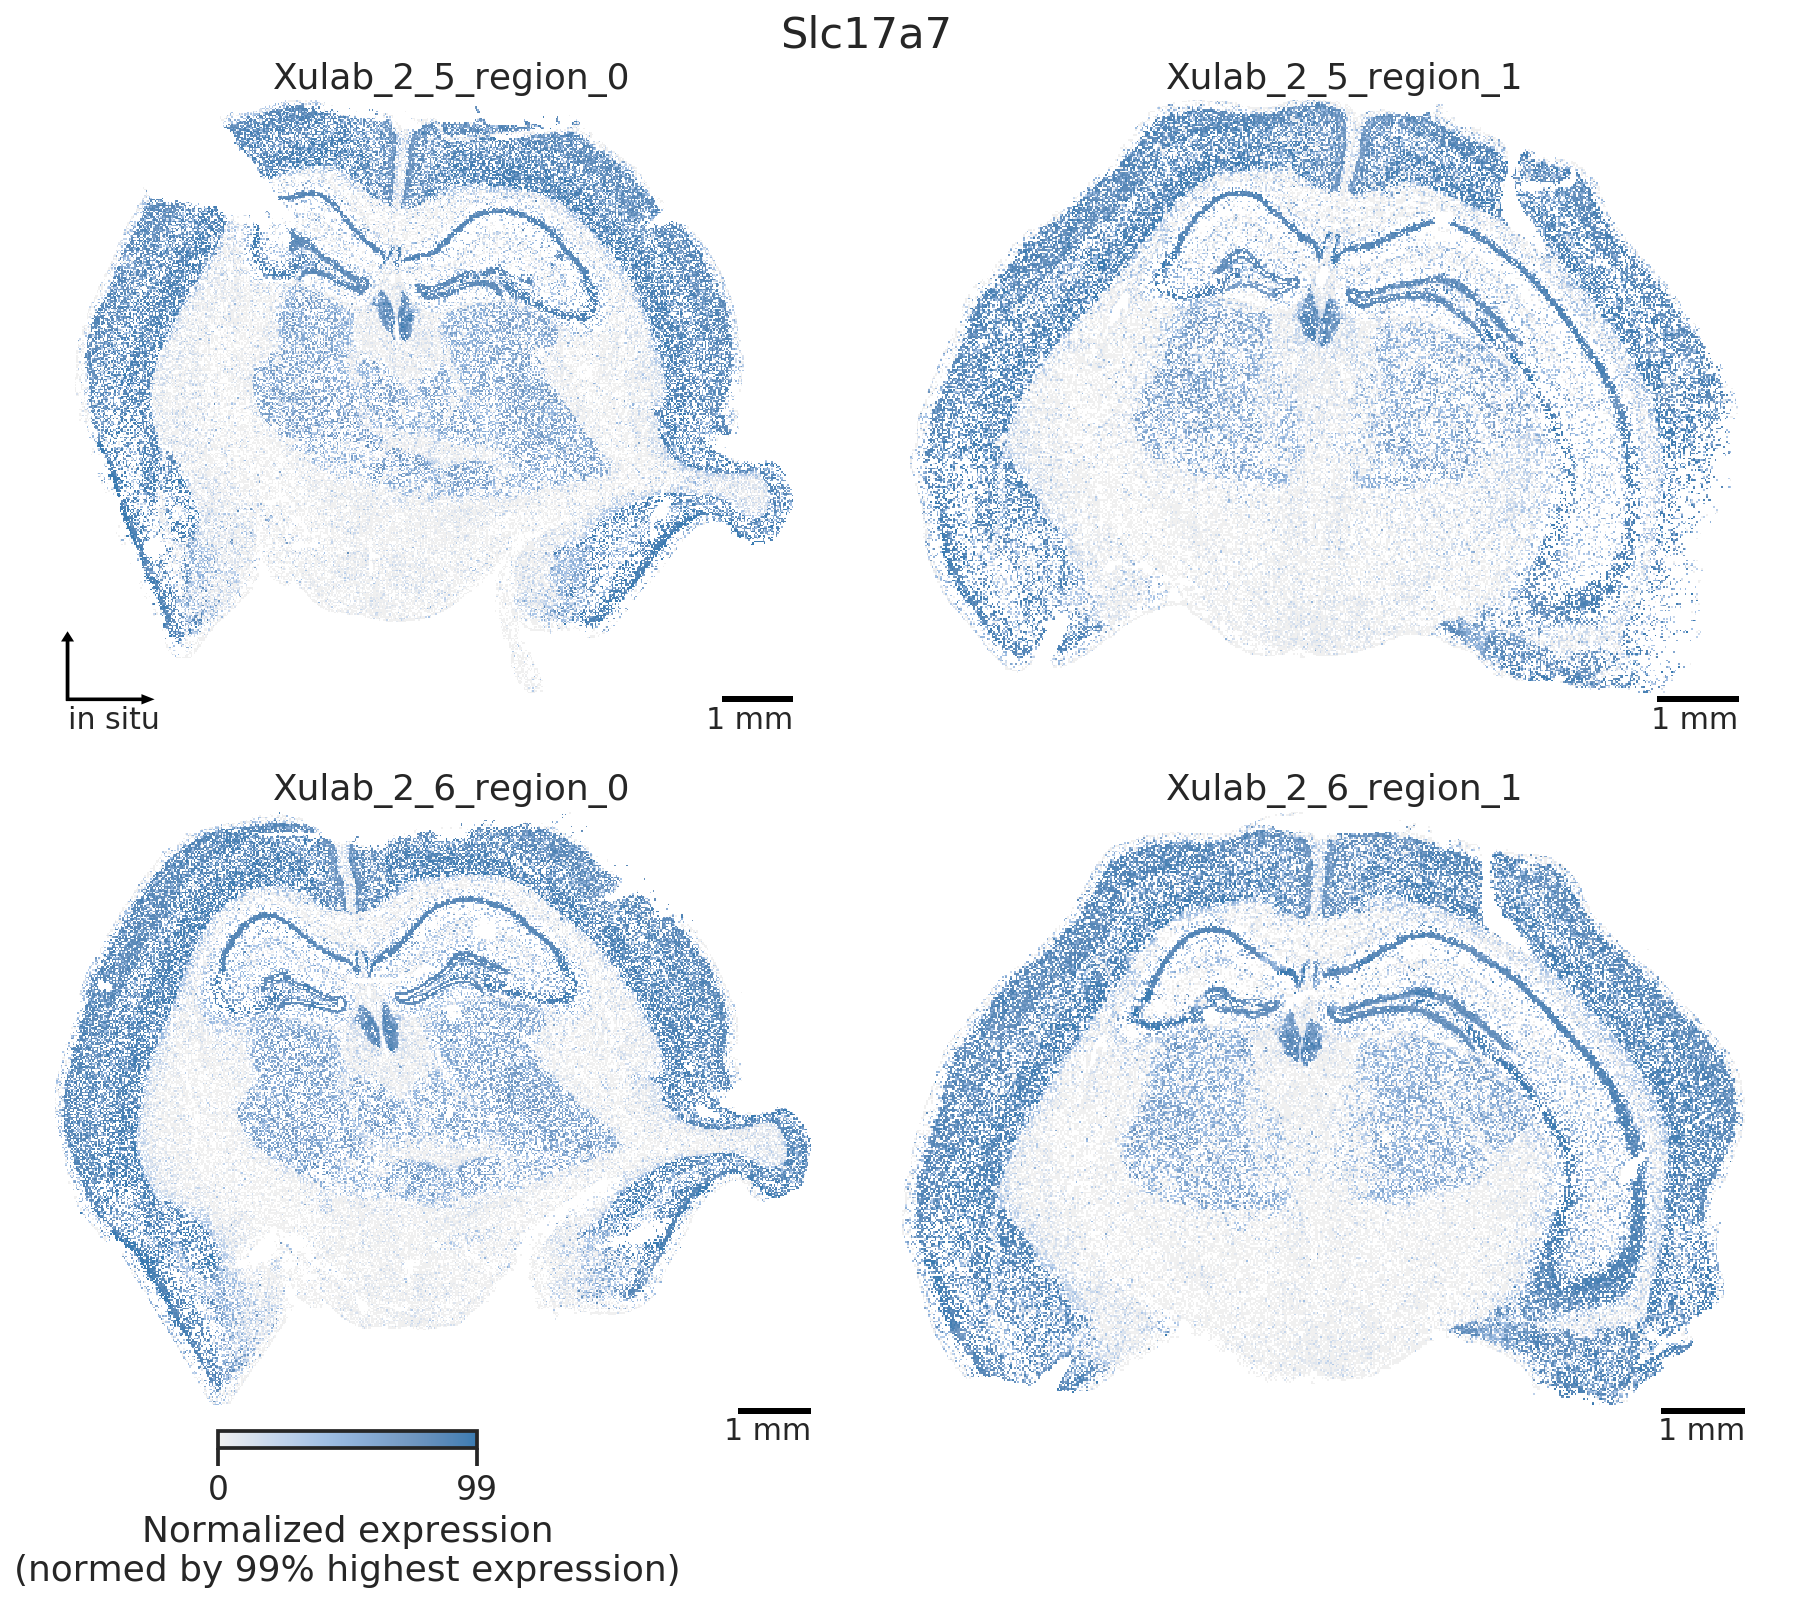

../figures/2021-06-02_AD_mouse_insitu_Slc17a7.png


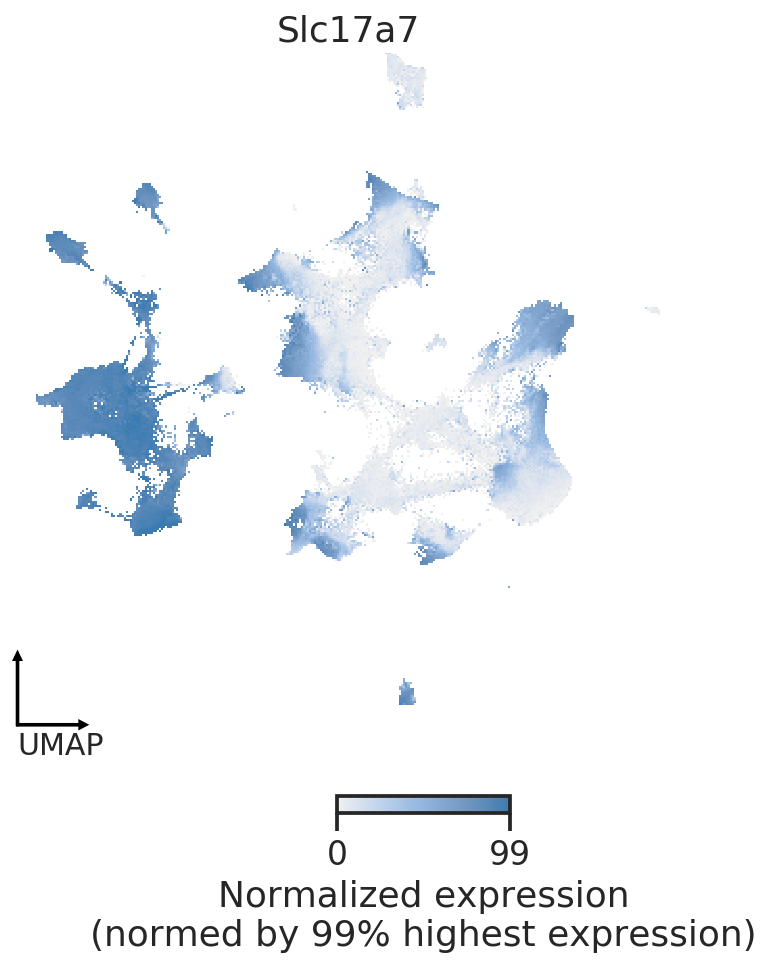

  0%|          | 0/1 [00:10<?, ?it/s]

../figures/2021-06-02_AD_mouse_umap_Slc17a7.png


In [8]:
# run genes view
selected_genes = ['Slc17a7']
for gene in tqdm.tqdm(selected_genes):
    # insitu 
    x, y, hue = 'x', 'y', gene
    output = figures.format("insitu_"+gene+".png")
    
    fig_plot_gene_insitu_routine(
        thedatagmat, samples, x, y, hue, 
        nx=2, ny=2, figsize=(9*2,6*2),
#         output=output, 
#         close=True,
        output='', 
        close=False,
        )
    print(output)
    
    # umap
    x, y, hue = 'umap_1', 'umap_2', gene
    output = figures.format("umap_"+gene+".png")
    
    fig_plot_gene_umap_routine(
        thedatagmat, x, y, hue, 
#         output=output,
#         close=True,
        output='',
        close=False,
        )
    print(output)
    break

### Run cluster viz (combined)

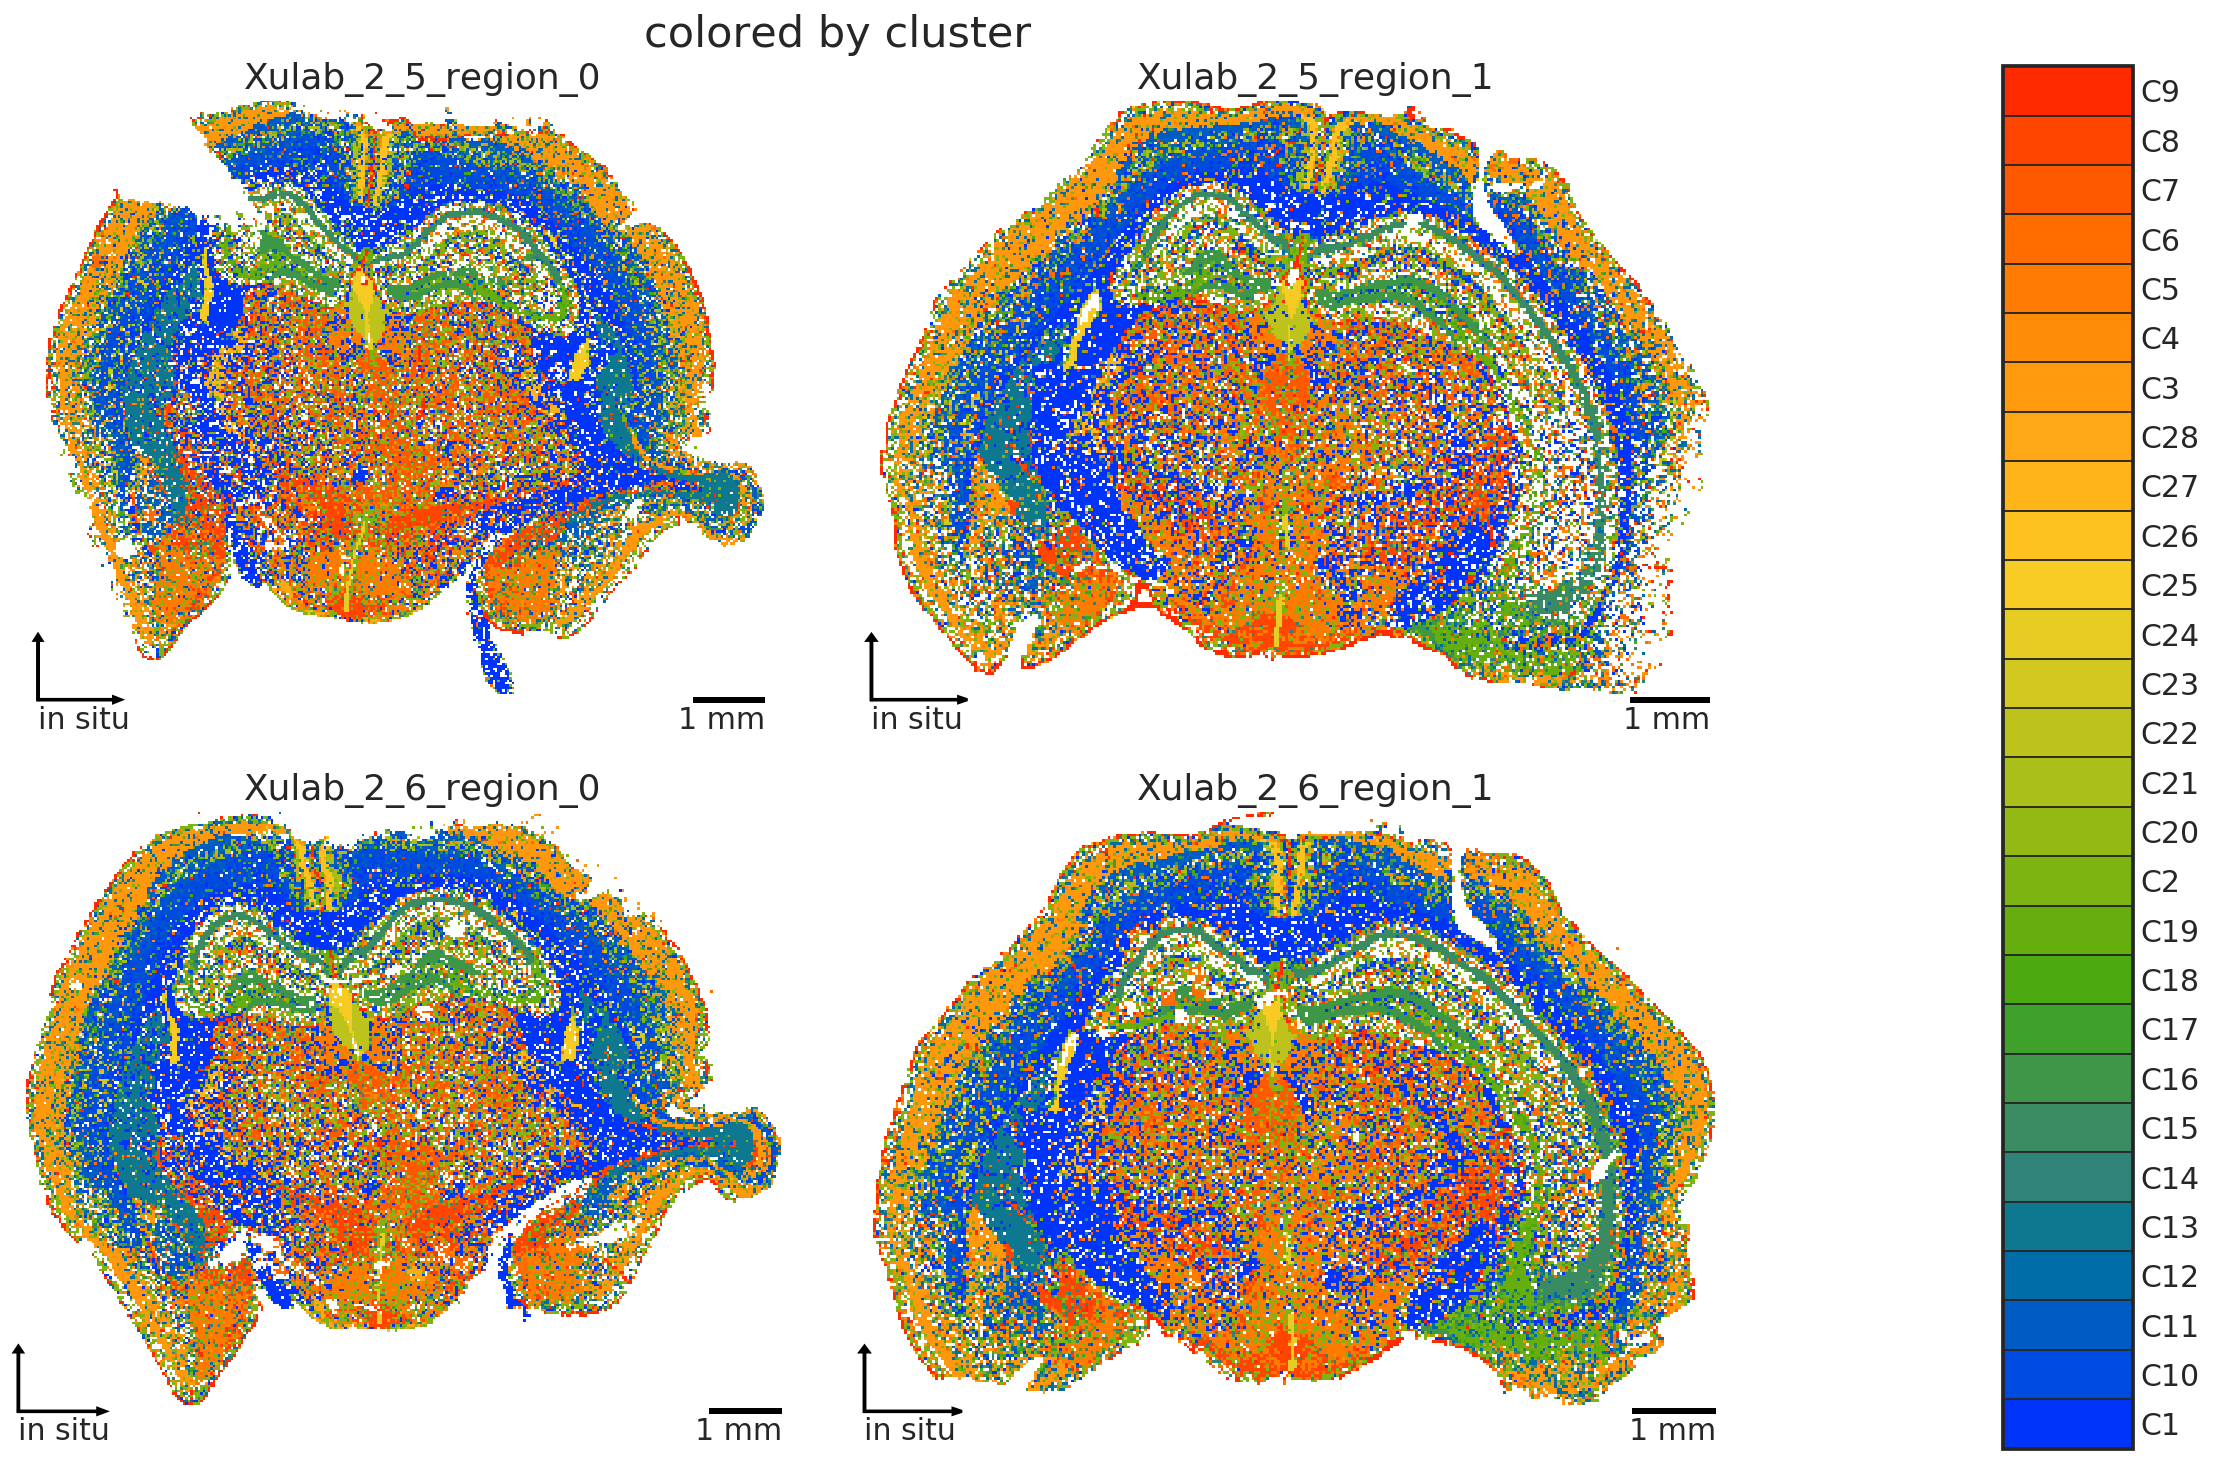

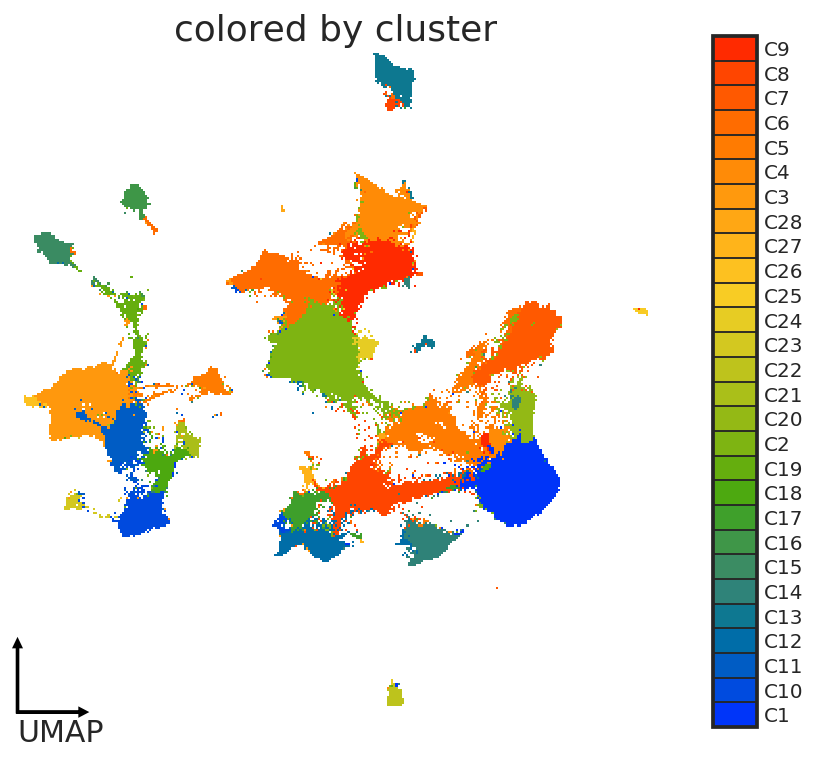

In [9]:
clusters = np.sort(thedata['cluster_cat'].cat.categories.values)
clstcolors_obj = powerplot.CategoricalColors(clusters)

# agg data for each sample
x, y, hue = 'x', 'y', 'cluster_cat'
suptitle = 'colored by cluster' 
output = figures.format("insitu_allclsts"+".png")
close = False
    
fig_plot_cluster_insitu_routine(
    thedata, samples, x, y, hue,
    clstcolors_obj,
    suptitle=suptitle,
    nx=2, ny=2, figsize=(9*2,6*2),
    close=close,
    output=output, 
    ) 

# plot all clusters UMAP
x, y, hue = 'umap_1', 'umap_2', 'cluster_cat'
title = 'colored by cluster' 
output = figures.format("umap_allclsts"+".png")
close = False
fig_plot_cluster_umap_routine(
    thedata, x, y, hue,
    clstcolors_obj,
    title=title,
    close=close,
    output=output,
    )

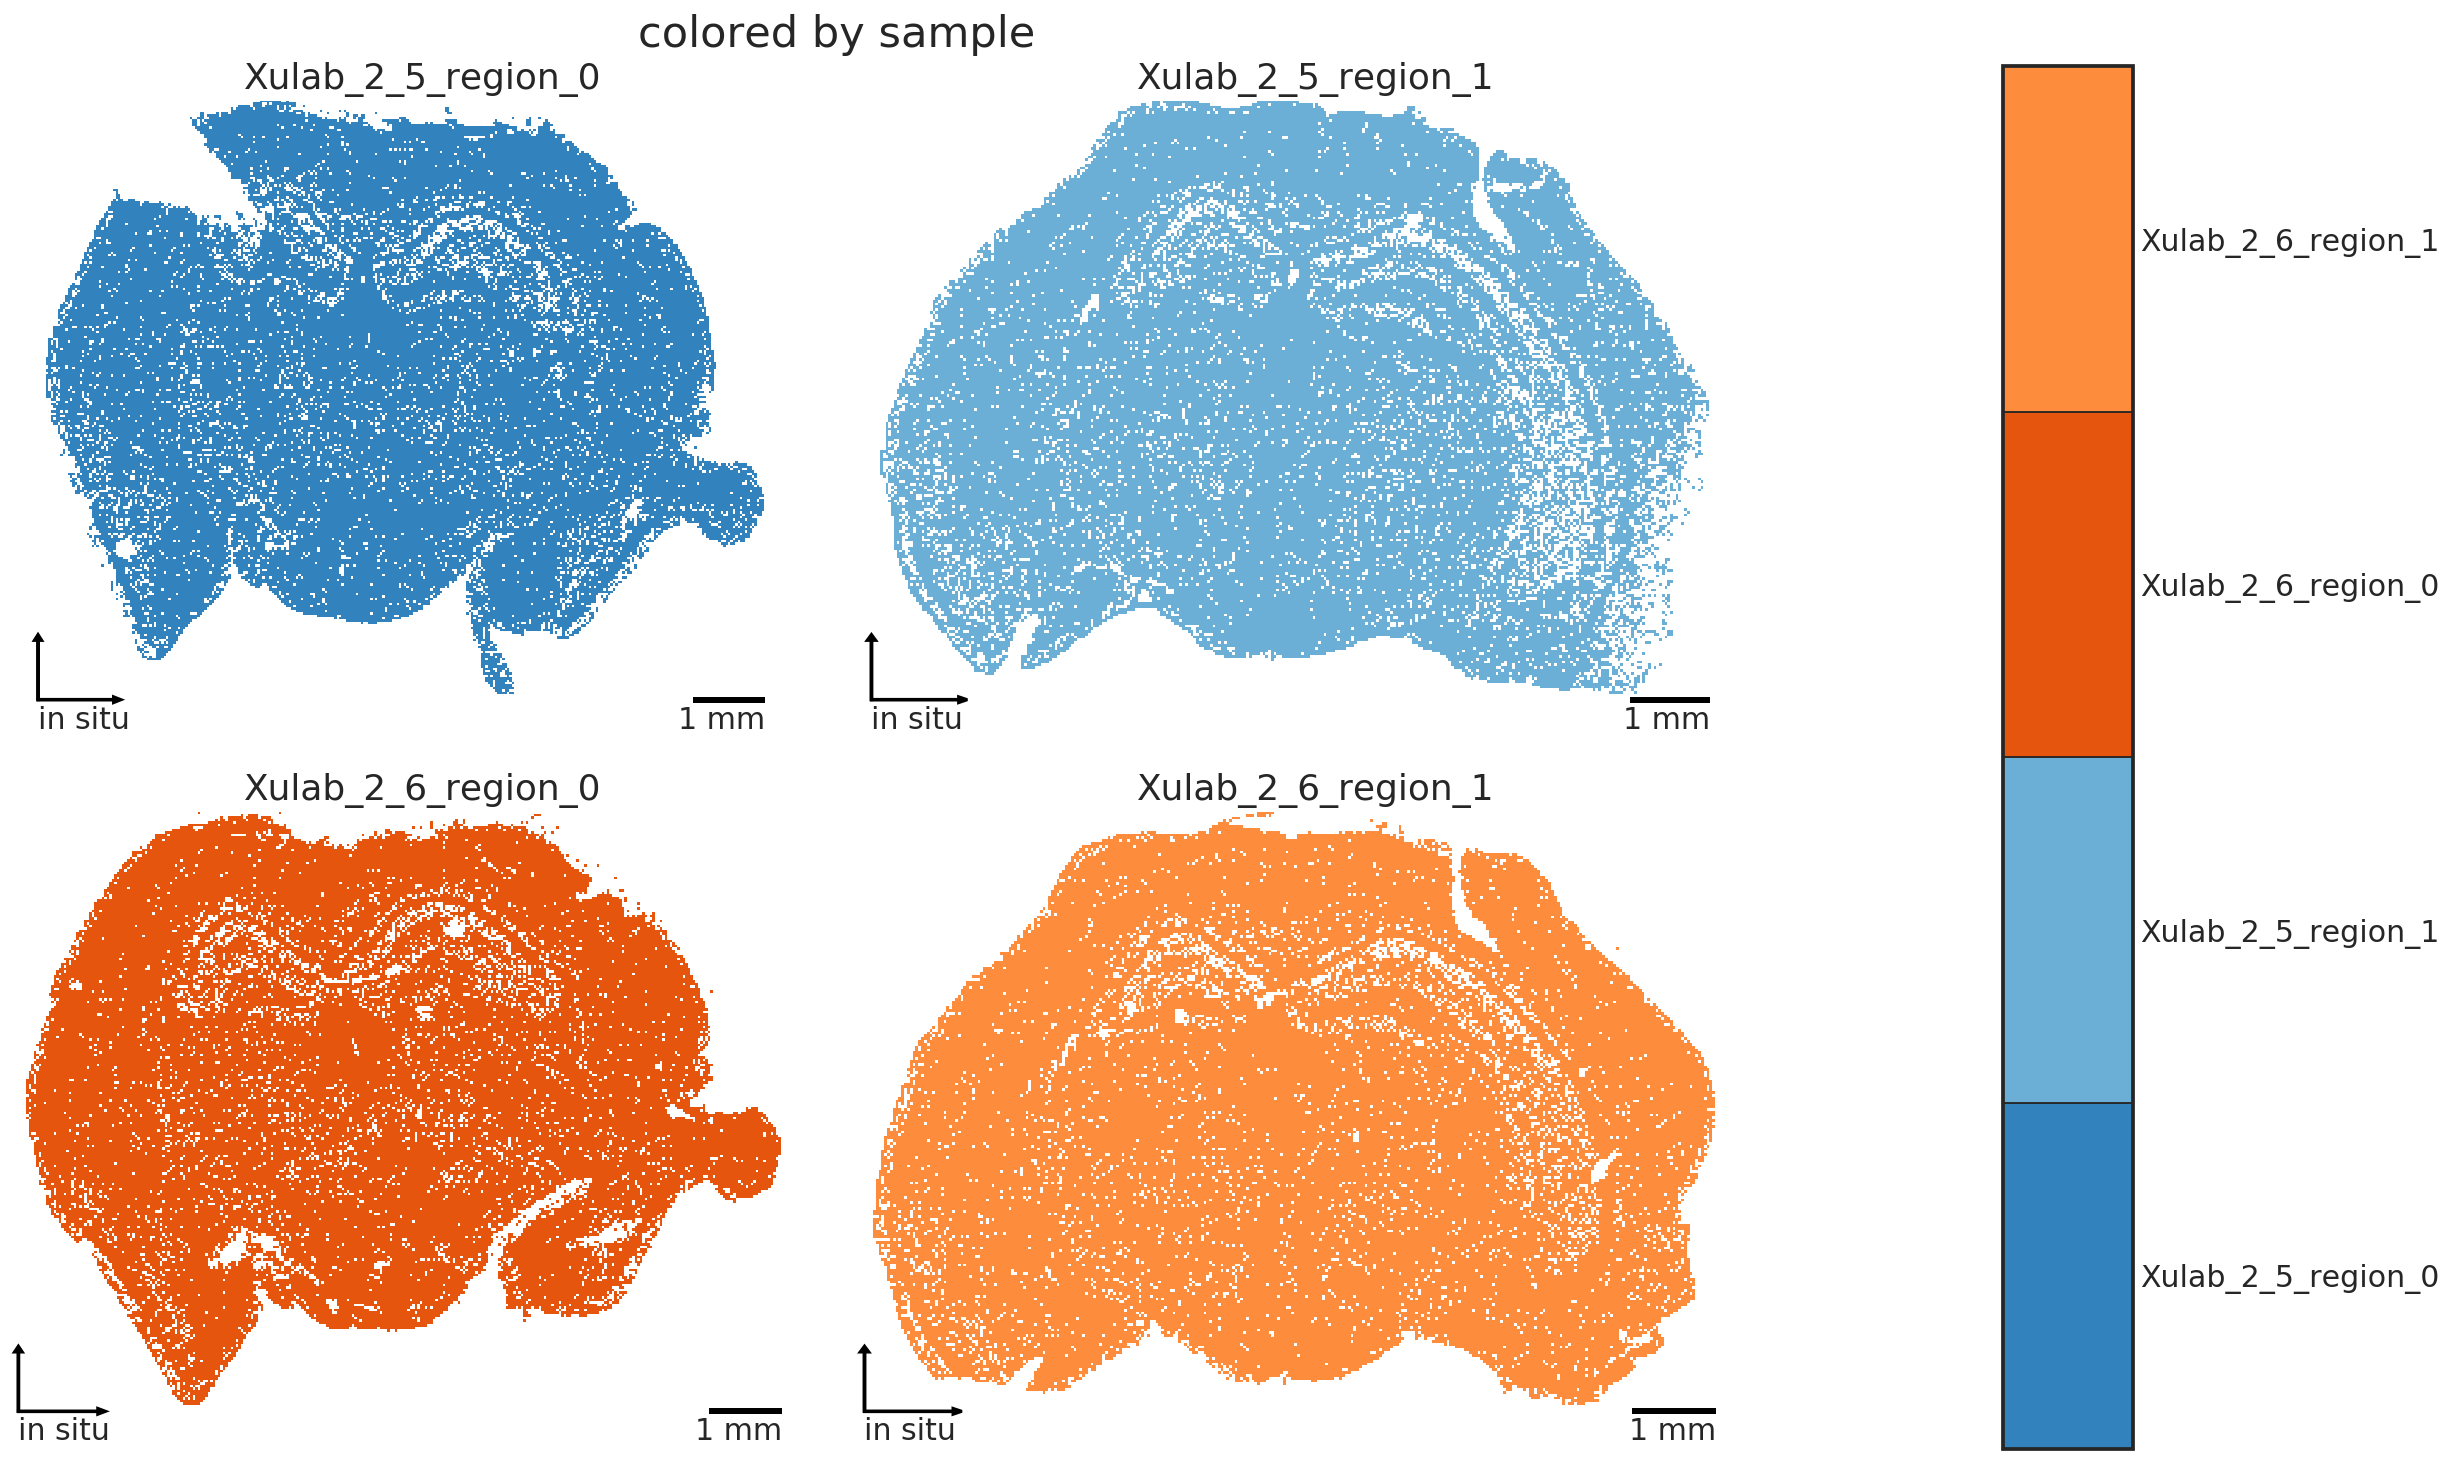

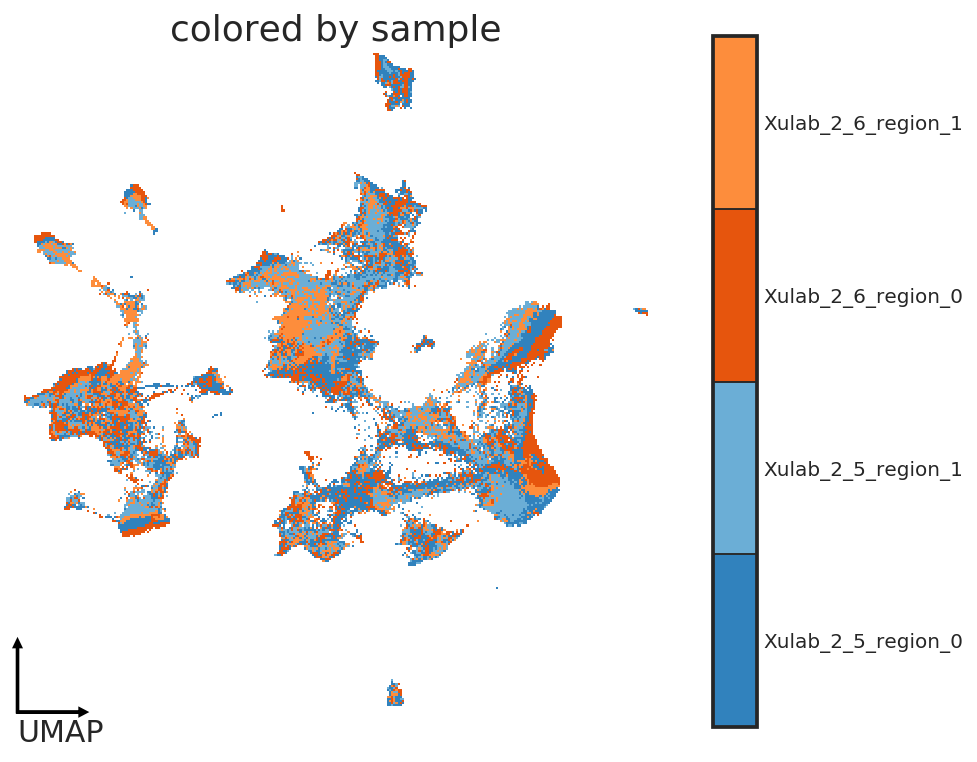

In [10]:
cat_col = 'sample_cat'
thedata[cat_col] = pd.Categorical(thedata['sample'])
categories = np.sort(thedata[cat_col].cat.categories.values)
clstcolors_obj = powerplot.CategoricalColors(categories, [palette[catg] for catg in categories])

# agg data for each sample
x, y, hue = 'x', 'y', cat_col
suptitle = 'colored by sample' 
output = figures.format("insitu_allclsts_"+cat_col+".png")
close = False
fig_plot_cluster_insitu_routine(
    thedata, samples, x, y, hue,
    clstcolors_obj,
    suptitle=suptitle,
    nx=2, ny=2, figsize=(9*2,6*2),
    close=close,
    output=output, 
    ) 

# plot all clusters UMAP
x, y, hue = 'umap_1', 'umap_2', cat_col
title = 'colored by sample'
output = figures.format("umap_allclsts_"+cat_col+".png")
close = False
fig_plot_cluster_umap_routine(
    thedata, x, y, hue,
    clstcolors_obj,
    title=title,
    close=close,
    output=output,
    )

In [36]:
# # selected clusters (preserve colors)
# clstcolors_obj = powerplot.CategoricalColors(
#     clusters)
# colors = clstcolors_obj.colors

# selected_clusters = ['C15', 'C16', 'C19']
# selected_colors = [
#     color if label in selected_clusters else 'lightgray'
#     for color, label in zip(colors, clusters)
# ]
# selected_clstcolors_obj = powerplot.CategoricalColors(
#     clusters, selected_colors,
# )

# selected clusters (not preserve colors)
colors = ['lightgray']*len(clusters)
selected_clusters = ['C15', 'C16', 'C19']
selected_colors = powerplot.CategoricalColors(selected_clusters).colors
for i, clst in enumerate(selected_clusters):
    idx = np.where(clusters==clst)[0][0]
    colors[idx] = selected_colors[i]
selected_clstcolors_obj = powerplot.CategoricalColors(clusters, colors)


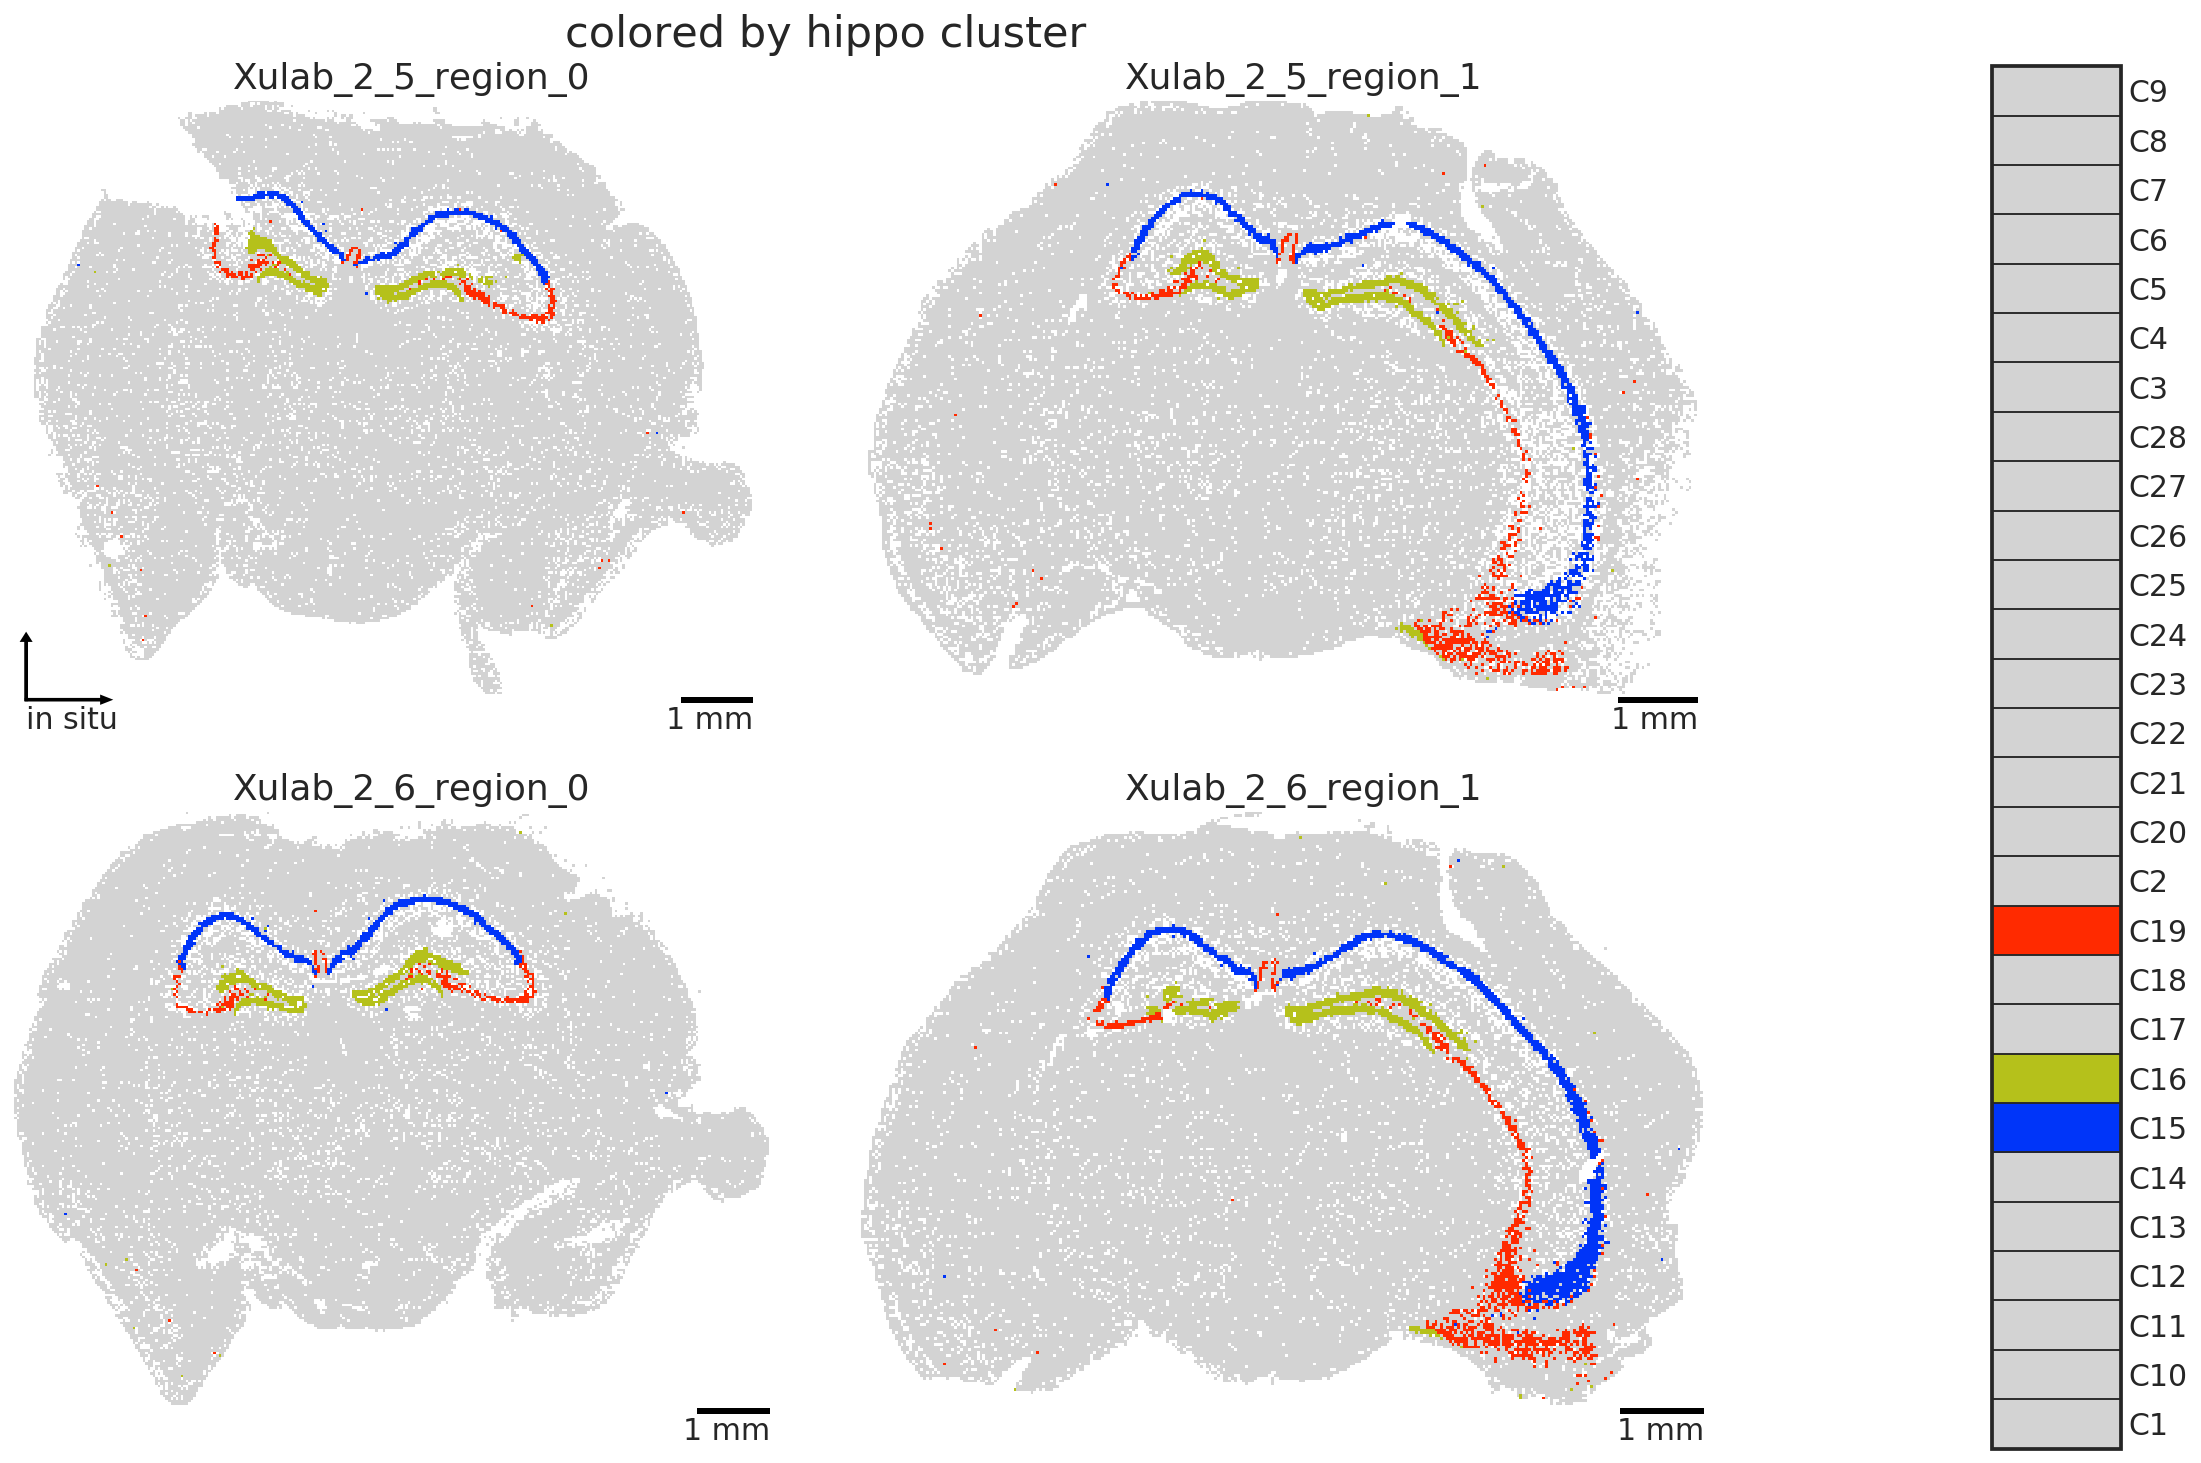

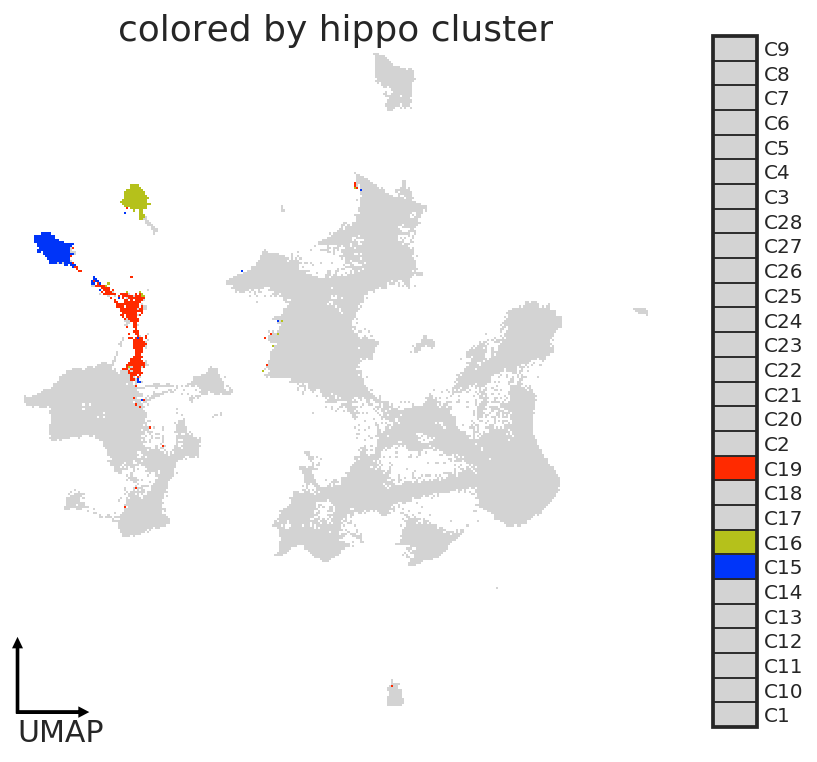

In [42]:

# agg data for each sample
x, y, hue = 'x', 'y', 'cluster_cat'
suptitle = 'colored by hippo cluster' 
output = figures.format("insitu_hippoclsts"+".png")
close = False
    
fig_plot_cluster_insitu_routine(
    thedata, samples, x, y, hue,
    selected_clstcolors_obj,
    suptitle=suptitle,
    nx=2, ny=2, figsize=(9*2,6*2),
    close=close,
    output=output, 
    ) 

# plot all clusters UMAP
x, y, hue = 'umap_1', 'umap_2', 'cluster_cat'
title = 'colored by hippo cluster' 
output = figures.format("umap_hippoclsts"+".png")
close = False
fig_plot_cluster_umap_routine(
    thedata, x, y, hue,
    selected_clstcolors_obj,
    title=title,
    close=close,
    output=output,
    )

### Run cluster viz (one-by-one)
- a bit clumsy

In [11]:
# agg data for each sample
ps_aggdata_insitu_allsamples = collections.OrderedDict({})
x, y, hue = 'x', 'y', 'cluster_cat'
scale_paras = dict(pxl_scale=20)

# agg data for each sample
for sample in tqdm.tqdm(samples):
    data = thedatagmat[thedatagmat['sample']==sample]
    aggdata, ps, _ = powerplot.agg_count_cat(data, x, y, hue, scale_paras, clip_max=1)
    ps_aggdata_insitu_allsamples[sample] = (aggdata, ps)

100%|██████████| 4/4 [00:00<00:00,  5.36it/s]


0it [00:00, ?it/s]

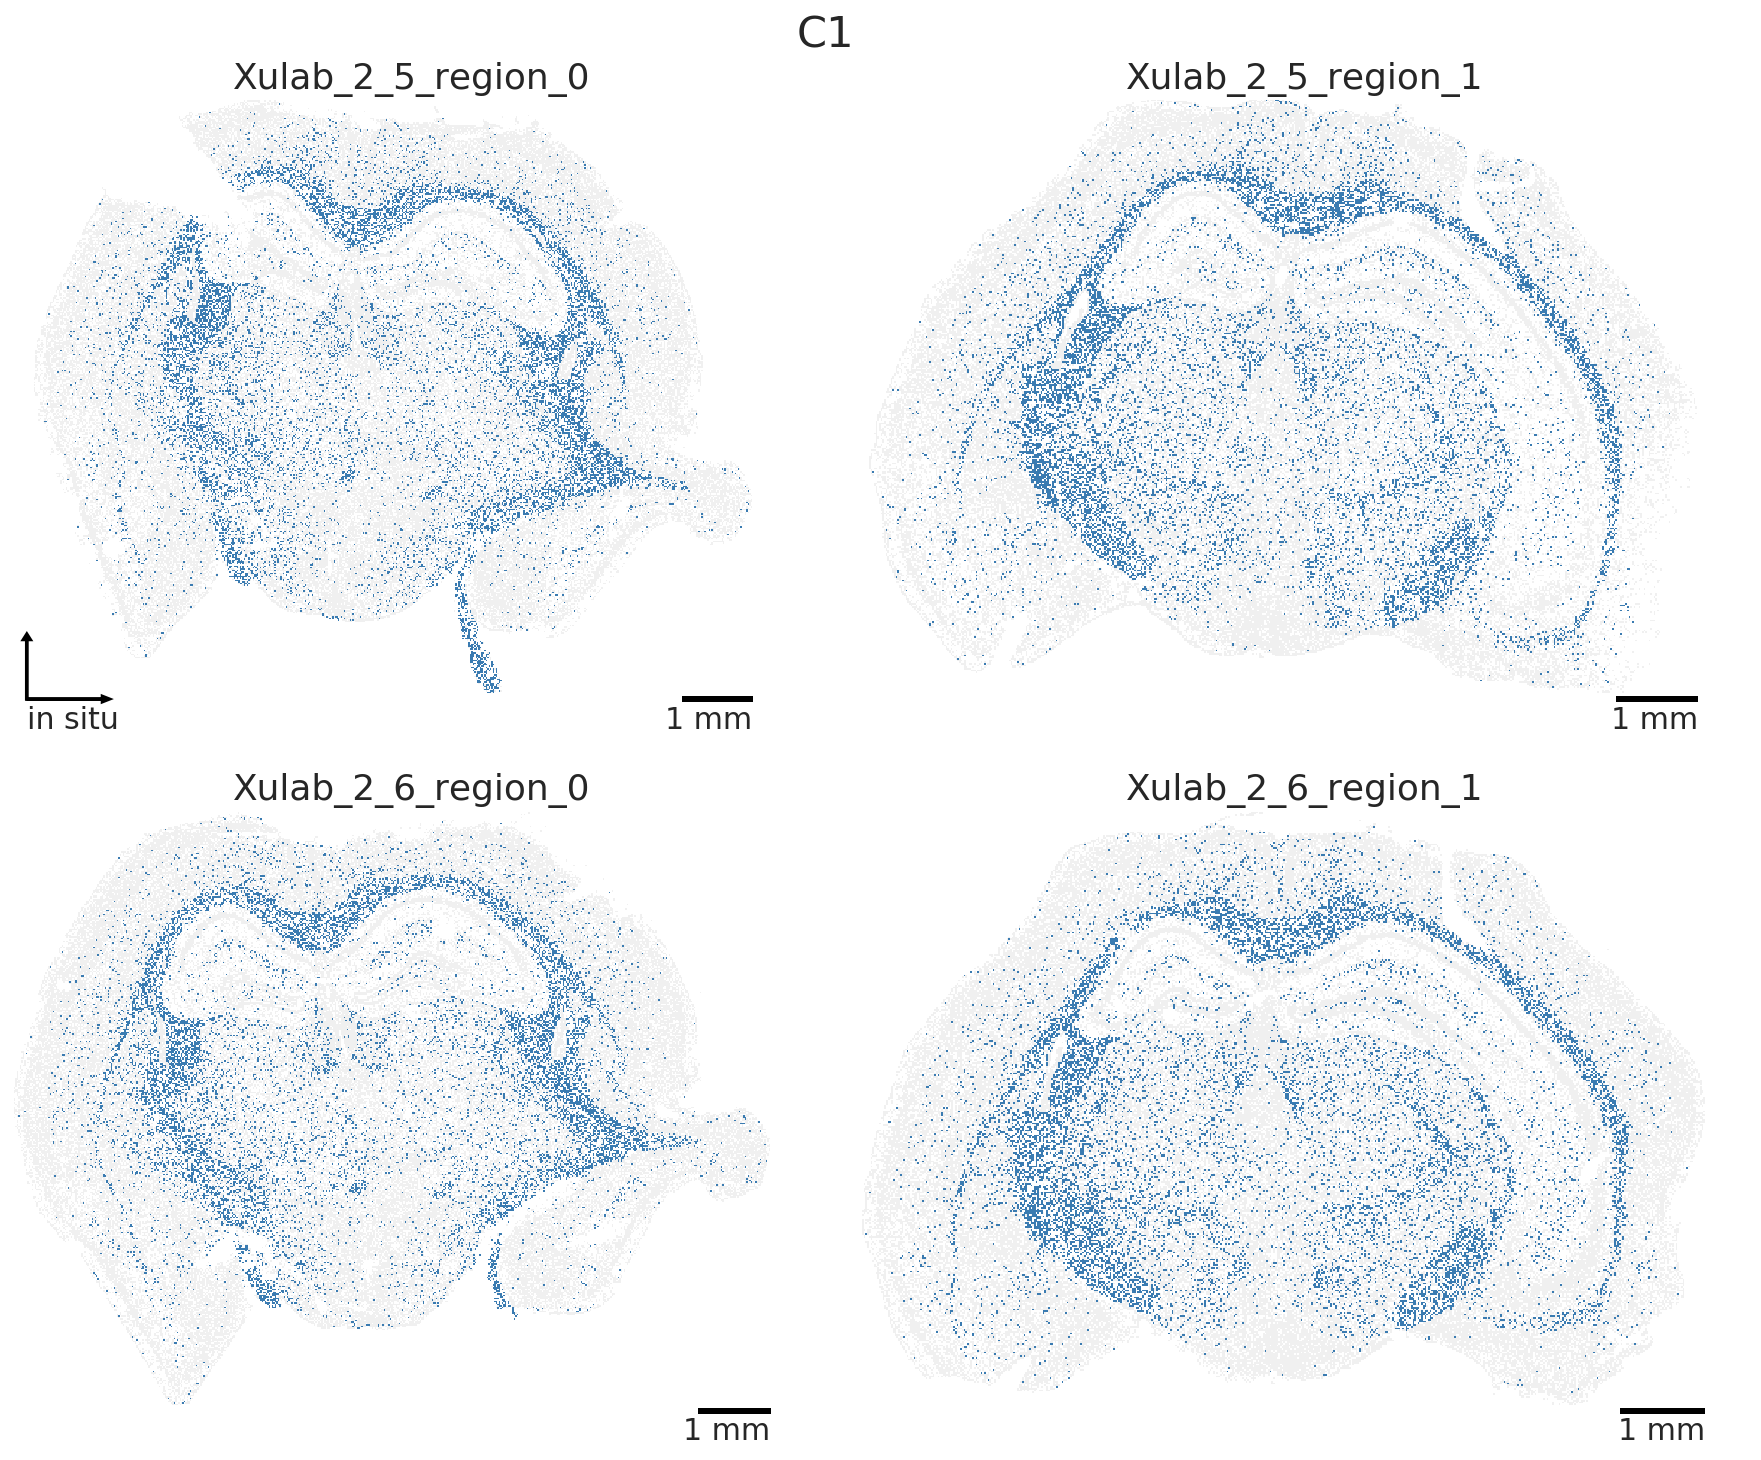

28it [01:42,  3.66s/it]


In [12]:
# then plot for each cluster
nx = 2
ny = 2
figsize=(9*ny,6*nx)
cmap = colorcet.cm.blues
close = True 
clusters = thedatagmat[hue].cat.categories.values

# then plot for each cluster
for k, clst in tqdm.tqdm(enumerate(clusters)):
    if k == 0:
        close = False
    else:
        close = True
    zlabel = clst
    output = figures.format("insitu_"+clst+".png")
    fig, axs = plt.subplots(ny, nx, figsize=figsize)
    for i, (ax, sample) in enumerate(zip(axs.flat, samples)):
        if i == 0:
            configs = dict(
                arrows=True,
                scalebar=True,
                )
        else:
            configs = dict(
                arrows=False,
                scalebar=True,
                )
        title = sample
        aggdata, ps = ps_aggdata_insitu_allsamples[sample]
        powerplot.plot_cluster_insitu_routine(
            ax, ps, aggdata, 
            hue, zlabel, title, cmap, 
            **configs,
            )
    fig.subplots_adjust(wspace=-0.2)
    fig.suptitle(zlabel, y=0.93)
    
    if output:
        utils.savefig(fig, output)
    if close:
        plt.close()
    else:
        plt.show()
        
#     break

In [13]:
# agg data for each sample
x, y, hue = 'umap_1', 'umap_2', 'cluster_cat'
scale_paras = dict(npxlx=300)
aggdata_umap, ps_umap, _ = powerplot.agg_count_cat(thedatagmat, x, y, hue, scale_paras, clip_max=1)

0it [00:00, ?it/s]

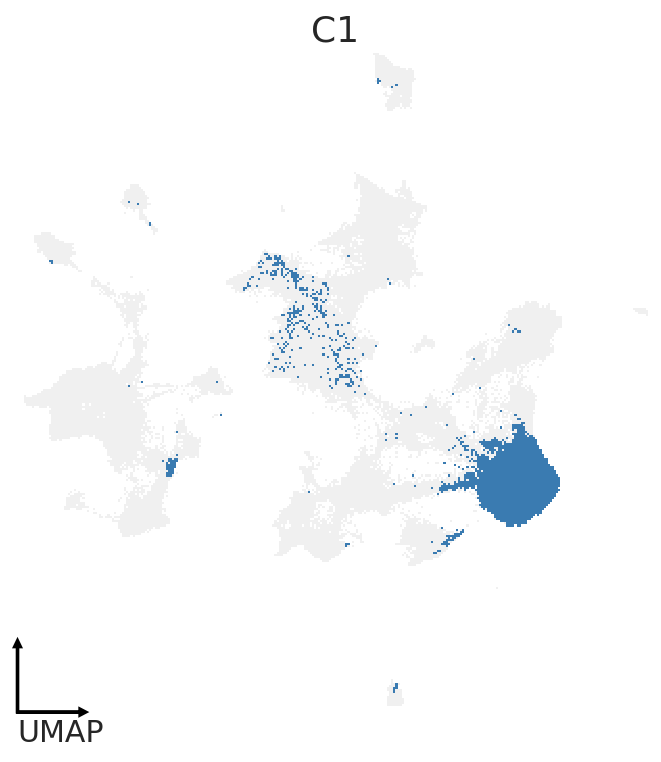

28it [00:22,  1.25it/s]


In [14]:
# then plot for each cluster
figsize=(6,6)
cmap = colorcet.cm.blues
clusters = thedatagmat[hue].cat.categories.values

# then plot for each cluster
for i, clst in tqdm.tqdm(enumerate(clusters)):
    if i == 0:
        close = False
    else:
        close = True
    zlabel = clst
    output = figures.format("umap_"+clst+".png")
    fig, ax = plt.subplots(figsize=figsize)
    title = sample
    ps, aggdata = ps_umap, aggdata_umap
    powerplot.plot_cluster_umap_routine(
        ax, ps, aggdata, 
        hue, zlabel, title, cmap, 
        arrows=True,
        )
    ax.set_title(zlabel)
    
    if output:
        utils.savefig(fig, output)
    if close:
        plt.close()
    else:
        plt.show()
        
#     break

# barplots -- number of cells for each clusters

## DE analysis
- WT vs 5xFAD (2), cell types (N), replicates (2)
- get an heatmap - Ngenes * 4Ncelltypes 